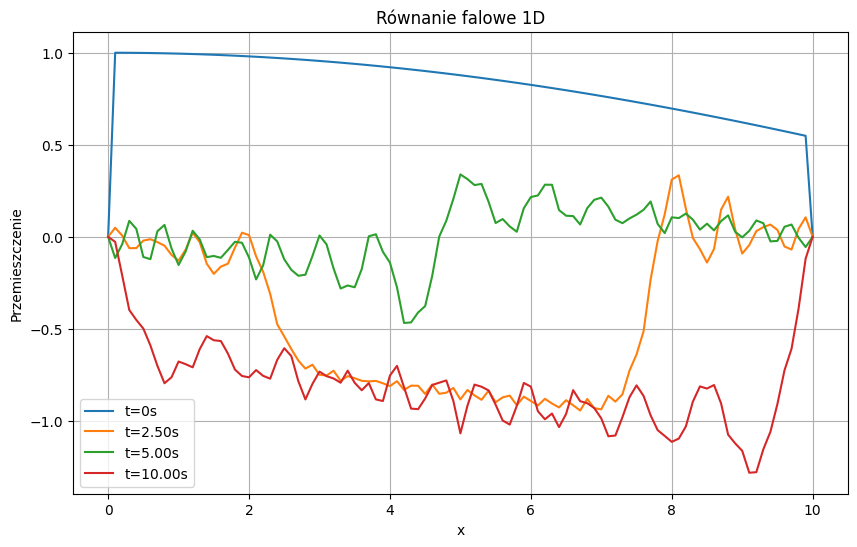

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
L = 10.0  # długość struny
T = 10.0  # czas symulacji
Nx = 100   # liczba punktów przestrzennych
Nt = 1000 # liczba punktów czasowych
c = 5.0   # prędkość fali

dx = L / Nx
dt = T / Nt

# Sprawdzenie stabilności (CFL condition)
r = c * dt / dx
if r > 1:
    raise ValueError("Warunek stabilności jest naruszony: c * dt / dx <= 1")

# Warunki początkowe i brzegowe
def f(x):
    return np.cos( x / L)  # początkowa dystrybucja pozycji

def g(x):
    return 0  # początkowa dystrybucja prędkości

# Tworzenie siatki i ustawienie warunków początkowych
x = np.linspace(0, L, Nx+1)
u = np.zeros((Nx+1, Nt+1))

# Początkowa pozycja i prędkość
u[:, 0] = f(x)
u[:, 1] = u[:, 0] + dt * g(x) + 0.5 * (r ** 2) * (np.roll(u[:, 0], -1) - 2 * u[:, 0] + np.roll(u[:, 0], 1))

# Warunki brzegowe w czasie
u[0, :] = 0  # lewy brzeg - Dirichlet condition
u[-1, :] = 0  # prawy brzeg - Dirichlet condition

# Symulacja
for j in range(1, Nt):
    u[1:-1, j+1] = 2 * (1 - r ** 2) * u[1:-1, j] - u[1:-1, j-1] + r ** 2 * (u[2:, j] + u[:-2, j])

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x, u[:, 0], label='t=0s')
plt.plot(x, u[:, int(Nt/4)], label=f't={T/4:.2f}s')
plt.plot(x, u[:, int(Nt/2)], label=f't={T/2:.2f}s')
plt.plot(x, u[:, -1], label=f't={T:.2f}s')
plt.xlabel('x')
plt.ylabel('Przemieszczenie')
plt.title('Równanie falowe 1D')
plt.legend()
plt.grid()
plt.show()